In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../DATA/hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [6]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [7]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='age'>

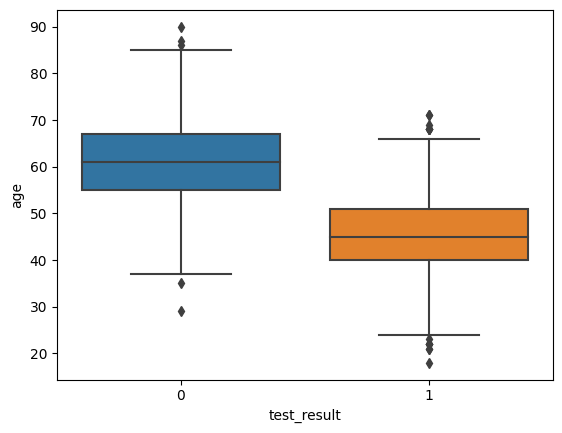

In [10]:
sns.boxplot(x='test_result', y='age', data=df)

<Axes: xlabel='physical_score', ylabel='test_result'>

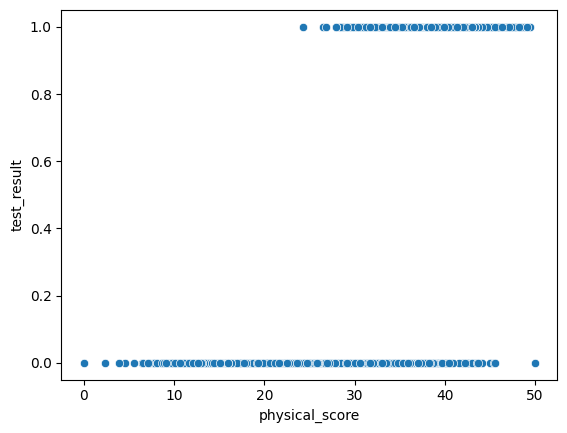

In [13]:
sns.scatterplot(x='physical_score', y='test_result', data=df)

In [16]:
X = df.drop('test_result', axis=1)
y=df['test_result']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [28]:
len(X_train)


4500

In [29]:
scaler = StandardScaler()

In [30]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logi_model = LogisticRegression()

In [33]:
logi_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [34]:
logi_model.coef_

array([[-0.94953524,  3.45991194]])

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [37]:
y_pred = logi_model.predict(scaled_X_test)

In [38]:
accuracy_score(y_test,y_pred)

0.924

In [39]:
confusion_matrix(y_test,y_pred)

array([[173,  20],
       [ 18, 289]], dtype=int64)